In [44]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [45]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [46]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [47]:
# Plot your data to see what's in your DataFrame
display(df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
))


:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [48]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(
    df_market_data[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]]
)

In [49]:
# Create a DataFrame with the scaled data
df_market_scaled = pd.DataFrame(
    market_data_scaled,
    columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]
)


# Copy the crypto names from the original data
df_market_scaled["coin_id"] = df_market_data.index

# Set the coinid column as index

df_market_scaled = df_market_scaled.set_index("coin_id")
# Display sample data
df_market_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [50]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [51]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(df_market_scaled)
    inertia.append(model.inertia_)

In [52]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


In [53]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)
elbow_plot

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**  4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [54]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [55]:
# Fit the K-Means model using the scaled data
model.fit(df_market_scaled)

KMeans(n_clusters=4)

In [56]:
# Predict the clusters to group the cryptocurrencies using the scaled data
market_clusters = model.predict(df_market_scaled)

# Print the resulting array of cluster values.
print(market_clusters)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 2 0 3 3 1
 3 3 3 3]


In [57]:
# Create a copy of the DataFrame
df_new_market=pd.DataFrame( df_market_scaled)

In [58]:
# Add a new column to the DataFrame with the predicted clusters

df_new_market["MarketCluster"] = market_clusters
# Display sample data
df_new_market.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,MarketCluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [59]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
plot1=df_new_market.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="MarketCluster",
    hover_cols = ["coin_id"], 
    title = "Scatter Plot"
)
plot1

:NdOverlay   [MarketCluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [60]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [61]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_pca_data = pca.fit_transform(df_new_market)

# View the first five rows of the DataFrame. 
market_pca_data[:5]

array([[ 2.05913887, -0.53668446, -0.43823774],
       [ 1.95640089, -0.41082149, -1.0169655 ],
       [-0.99014153, -0.45422783,  0.69002131],
       [-0.9731886 , -0.49464992,  0.55123402],
       [ 3.33036692, -1.02231141, -0.50134143]])

In [62]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.38939231, 0.29166039, 0.20810061])

In [63]:
sum(pca.explained_variance_ratio_)

0.8891533061505712

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** About 88% of the total variance is condensed into the 3 PCA variables, indicating a high level of predictability. In cryptocurrency trading, high variance is essential for accurately predicting price trends and seizing opportunities for significant returns. However, it also amplifies the risk of substantial losses

In [64]:
# Create a new DataFrame with the PCA data.
df_market_pca = pd.DataFrame(market_pca_data, columns=["PC1", "PC2","PC3"])
# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
df_market_pca["coin_id"] = df_market_data.index

# Set the coinid column as index

df_market_pca = df_market_pca.set_index("coin_id")
# Display sample data
df_market_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,2.059139,-0.536684,-0.438238
ethereum,1.956401,-0.410821,-1.016966
tether,-0.990142,-0.454228,0.690021
ripple,-0.973189,-0.494650,0.551234
bitcoin-cash,3.330367,-1.022311,-0.501341


---

### Find the Best Value for k Using the PCA Data

In [65]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [66]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(df_market_pca)
    inertia.append(model.inertia_)

In [67]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

In [68]:
df_elbow_pca.head()

,k,inertia
0,1,325.408423
1,2,237.474091
2,3,108.664758
3,4,39.883324
4,5,35.601490


In [69]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca = df_elbow_pca.hvplot.line(x="k", y="inertia", title="Elbow Curve Using PCA Data", xticks=k)
elbow_plot_pca

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  No It is not different.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [70]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=2)

In [71]:
# Fit the K-Means model using the PCA data
model.fit(df_market_pca)

KMeans(n_clusters=2)

In [72]:
# Predict the clusters to group the cryptocurrencies using the PCA data
m_clusters = model.predict(df_market_pca)
# Print the resulting array of cluster values.
print(m_clusters)

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0
 1 1 1 1]


In [73]:
# Create a copy of the DataFrame with the PCA data

df_market_pca_predictions = df_market_pca.copy()

# Add a new column to the DataFrame with the predicted clusters

df_market_pca_predictions["m_clusters"] = m_clusters

# Display sample data
df_market_pca_predictions.head()

,PC1,PC2,PC3,m_clusters
coin_id,,,,
bitcoin,2.059139,-0.536684,-0.438238,0
ethereum,1.956401,-0.410821,-1.016966,0
tether,-0.990142,-0.454228,0.690021,1
ripple,-0.973189,-0.494650,0.551234,1
bitcoin-cash,3.330367,-1.022311,-0.501341,0


In [74]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
plot2=df_market_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="m_clusters",
    title = "Scatter Plot - PCA=2"
)
plot2

:NdOverlay   [m_clusters]
   :Scatter   [PC1]   (PC2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [75]:
# Composite plot to contrast the Elbow curves
df_elbow_pca.hvplot.line(x="k", y="inertia", title="Elbow Curve Using PCA Data", xticks=k) + df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

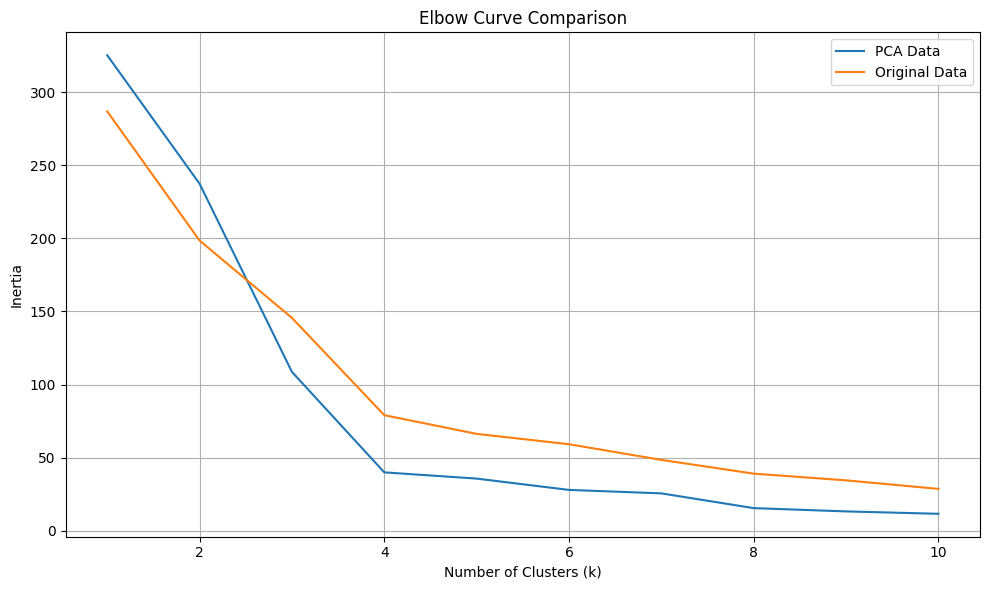

In [76]:
# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the elbow curve using PCA data
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], label='PCA Data')

# Plot the elbow curve without PCA
plt.plot(df_elbow['k'], df_elbow['inertia'], label='Original Data')

# Set title and labels
plt.title('Elbow Curve Comparison')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
plot2 = df_market_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="m_clusters",
    title="PCA Cluster Contrast"
)

# Create the scatter plot for market features
plot1 = df_new_market.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="MarketCluster",
    hover_cols=["coin_id"],
    title="Market Feature Cluster Contrast"
)

# Combine both plots into a single layout
composite_plot = plot1 + plot2

# Display the composite plot
composite_plot

:Layout
   .NdOverlay.I  :NdOverlay   [MarketCluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [m_clusters]
      :Scatter   [PC1]   (PC2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** From these insights, it appears that employing a reduced set of features (PCA data) for clustering cryptocurrency data with K-Means has yielded favorable outcomes. This approach has facilitated the formation of more distinct and distinguishable clusters when compared to utilizing the original dataset. By diminishing the feature set via PCA, critical patterns are likely accentuated, while the influence of noise is mitigated. Consequently, the clustering results are more precise and relevant, enhancing the interpretability and accuracy of the analysis.